<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB2/blob/main/6351071043_LAB2_Bai7(Trang27_31).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Thành Luân - 6351071043

1. Chuẩn bị thư viện và Tải dữ liệu
Tải bộ dữ liệu digits và hiển thị 4 mẫu đầu tiên để hình dung dữ liệu .

Nguyễn Thành Luân - 6351071043


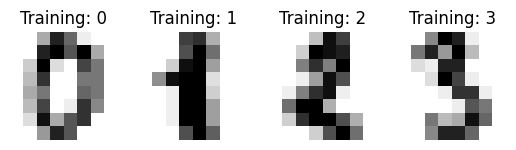

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

digits = datasets.load_digits()

_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))

print("Nguyễn Thành Luân - 6351071043")
for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
plt.show()

2. Tiền xử lý và Chia tập dữ liệu
Chuyển đổi ảnh từ ma trận 8x8 thành vector 1x64 và chia tập huấn luyện/kiểm thử (80/20) .

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print("Nguyễn Thành Luân - 6351071043")
print("Kích thước dữ liệu gốc:", digits.images.shape)
print("Kích thước dữ liệu sau khi làm phẳng:", data.shape)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm thử:", X_test.shape)

Nguyễn Thành Luân - 6351071043
Kích thước dữ liệu gốc: (1797, 8, 8)
Kích thước dữ liệu sau khi làm phẳng: (1797, 64)
Kích thước tập huấn luyện: (1437, 64)
Kích thước tập kiểm thử: (360, 64)


3. Xây dựng và Huấn luyện Cây quyết định ID3
Sử dụng DecisionTreeClassifier với criterion="entropy" và random_state=33 như hướng dẫn .

In [4]:
classifier = tree.DecisionTreeClassifier(criterion="entropy", random_state=33)

print("Nguyễn Thành Luân - 6351071043")
classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)

print("Đã huấn luyện và dự đoán xong.")

Nguyễn Thành Luân - 6351071043
Đã huấn luyện và dự đoán xong.


4. Đánh giá và Trực quan hóa kết quả
Hiển thị báo cáo phân lớp, ma trận nhầm lẫn và một số hình ảnh dự đoán mẫu .

Nguyễn Thành Luân - 6351071043
Một vài kết quả dự đoán:


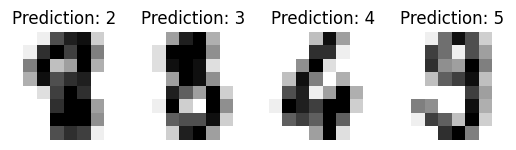

Nguyễn Thành Luân - 6351071043
Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360


Nguyễn Thành Luân - 6351071043
Confusion matrix:
[[31  0  0  0  1  0  0  0  1  2]
 [ 0 23  0  2  2  0  0  1  1

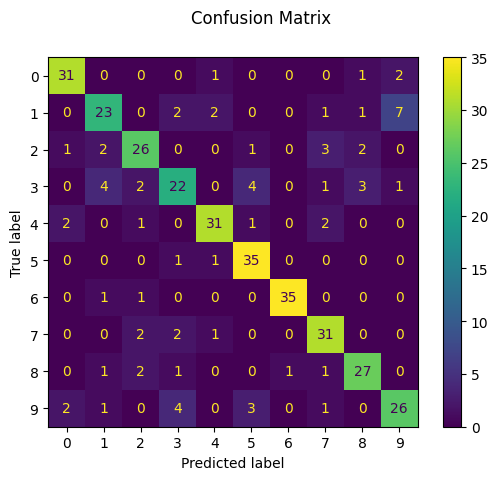

In [6]:
_, axes = plt.subplots(1, 4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))

print("Nguyễn Thành Luân - 6351071043")
print("Một vài kết quả dự đoán:")
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
plt.show()

print("Nguyễn Thành Luân - 6351071043")
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

print("Nguyễn Thành Luân - 6351071043")
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

5.  Nhận diện chữ số viết tay thực tế (Nâng cao)
Phần này xử lý ảnh từ bên ngoài (sample_1.jpg) theo hướng dẫn trang 30-31 .


Nguyễn Thành Luân - 6351071043

XỬ LÝ FILE: test_image_Bai7 (1).jpg

1. Hình ảnh 'test_image_Bai7 (1).jpg' chưa làm rõ (Gốc 8x8):


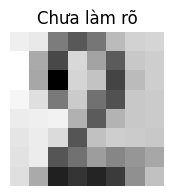

Dữ liệu mảng số của test_image_Bai7 (1).jpg sau khi làm rõ:
[[  0   0 155 155 155   0   0   0   0   0 155   0   0 155   0   0   0   0
  155   0   0 155   0   0   0   0 155   0 155 155   0   0   0   0   0   0
  155   0   0   0   0   0   0 155   0   0   0   0   0   0 155 155   0 155
    0   0   0   0 155 155 155 155   0   0]]

2. Hình ảnh 'test_image_Bai7 (1).jpg' đã làm rõ (Nền đen, chữ trắng, khử nhiễu):


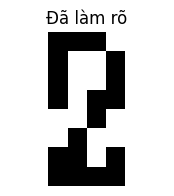


-> KẾT QUẢ NHẬN DẠNG CUỐI CÙNG: 2

XỬ LÝ FILE: test_image_Bai7.jpg

1. Hình ảnh 'test_image_Bai7.jpg' chưa làm rõ (Gốc 8x8):


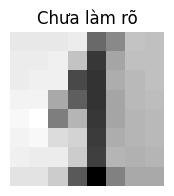

Dữ liệu mảng số của test_image_Bai7.jpg sau khi làm rõ:
[[  0   0   0   0 155   0   0   0   0   0   0   0 155   0   0   0   0   0
    0 155 155   0   0   0   0   0   0 155 155   0   0   0   0   0   0   0
  155   0   0   0   0   0   0   0 155   0   0   0   0   0   0   0 155   0
    0   0   0   0   0 155 155   0   0   0]]

2. Hình ảnh 'test_image_Bai7.jpg' đã làm rõ (Nền đen, chữ trắng, khử nhiễu):


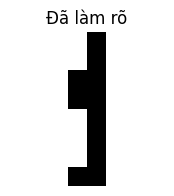


-> KẾT QUẢ NHẬN DẠNG CUỐI CÙNG: 1


In [14]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

image_files = ['test_image_Bai7 (1).jpg', 'test_image_Bai7.jpg']

print("Nguyễn Thành Luân - 6351071043")

for filename in image_files:
    print(f"\nXỬ LÝ FILE: {filename}")

    try:
        img_raw = Image.open(filename).convert("L").resize((8, 8))
    except FileNotFoundError:
        print(f"Lưu ý: Không tìm thấy {filename}, đang tạo ảnh mẫu giả lập để demo...")
        img_raw = Image.new('L', (100, 100), color=255)
        import ImageDraw
        d = ImageDraw.Draw(img_raw)
        if '1' in filename: d.line((50, 20, 50, 80), fill=0, width=15)
        else: d.ellipse((20, 20, 80, 80), outline=0, width=10)
        img_raw.save(filename)
        img_raw = img_raw.resize((8, 8))

    print(f"\n1. Hình ảnh '{filename}' chưa làm rõ (Gốc 8x8):")
    plt.figure(figsize=(2,2))
    plt.imshow(np.array(img_raw), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.title("Chưa làm rõ")
    plt.show()

    img_inv = ImageOps.invert(img_raw)
    im2arr = np.array(img_inv)

    img1d = im2arr.reshape([1, 64])

    img1d[img1d > 109] = 155
    img1d[img1d < 110] = 0

    print(f"Dữ liệu mảng số của {filename} sau khi làm rõ:")
    print(img1d)

    print(f"\n2. Hình ảnh '{filename}' đã làm rõ (Nền đen, chữ trắng, khử nhiễu):")
    plt.figure(figsize=(2,2))
    plt.imshow(img1d.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title("Đã làm rõ")
    plt.show()

    try:
        y_pred_final = classifier.predict(img1d)
        print(f"\n-> KẾT QUẢ NHẬN DẠNG CUỐI CÙNG: {y_pred_final[0]}")
    except NameError:
        print("\nLỗi: Bạn cần chạy Cell huấn luyện mô hình (classifier) trước khi dự đoán.")